# ML comparisons

In [1]:
import pandas as pd
from remseno import *

data_dir = '../data/to_publish/'

df = pd.read_csv(f'{data_dir}inat_indicie_training_data.csv')

2024-03-08 08:17:19.554697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = df.drop_duplicates()

In [3]:
num_species = df['species'].value_counts()
species = num_species[num_species.values > 200].index
species

Index(['Acer rubrum', 'Liquidambar styraciflua', 'Platanus occidentalis',
       'Thuja occidentalis', 'Pseudotsuga menziesii', 'Acer saccharum',
       'Acer negundo', 'Pinus strobus', 'Populus tremuloides', 'Quercus alba',
       'Betula alleghaniensis', 'Juglans nigra', 'Sassafras albidum',
       'Tsuga canadensis', 'Populus deltoides', 'Fagus grandifolia',
       'Asimina triloba'],
      dtype='object', name='species')

In [4]:
df = df[df['species'].isin(species)]

In [5]:
shared_species = set(df['species'])

# Do a final visualisation of the dataset

In [43]:
# Filter to only include species in NEON
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5)

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_shared_many_species_map.svg')
plt.show()

c = Countplot(df, x='family', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('iNat family')
plt.savefig(f'{fig_dir}Figure1_inat_family_shared_many_species.svg')
plt.show()


c = Countplot(tallo_df, x='genus', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('iNat genus')
plt.savefig(f'{fig_dir}Figure1_inat_genus_shared_many_species.svg')
plt.show()


KeyError: 'longitude'

In [6]:
import itertools
comb_2 = list(itertools.combinations(shared_species, 2))
comb_3 = list(itertools.combinations(shared_species, 3))
comb_4 = list(itertools.combinations(shared_species, 4))

In [7]:
comb_4

[('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Quercus alba'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Pinus strobus'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Acer rubrum'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Sassafras albidum'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Thuja occidentalis'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Juglans nigra'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Pseudotsuga menziesii'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Liquidambar styraciflua'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  'Tsuga canadensis'),
 ('Platanus occidentalis',
  'Betula alleghaniensis',
  'Populus tremuloides',
  '

# Filter the datasets to only include the shared species

In [8]:
train_df['species'].value_counts()

NameError: name 'train_df' is not defined

In [9]:
u = SciUtil()

from sklearn.model_selection import train_test_split
train_df, neon_gold_df = train_test_split(df, test_size=0.2)


In [10]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

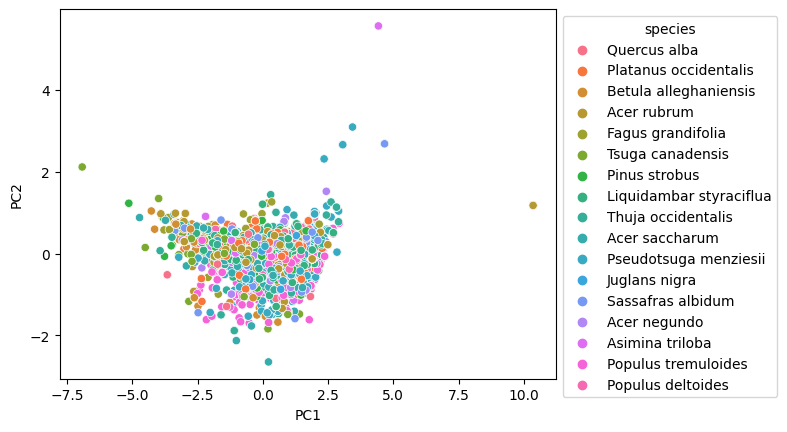

In [12]:
# We can make a PCA of the normalised values
from sklearn.decomposition import PCA
import seaborn as sns
masking_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']
fig_dir = f'{data_dir}figs/'
t_df = train_df.copy()
X = train_df[masking_cols].values
X = np.nan_to_num(X)
pca = PCA(n_components=2)
min_x = X.min(axis=0)
max_x = X.max(axis=0)
mean_x = X.mean(axis=0)
std_x = X.std(axis=0)
X = (X - mean_x)/std_x
X_std = (X - min_x) / (max_x - min_x)

pca.fit(X_std)
pc_X = pca.transform(X_std)
t_df['PC1'] = pc_X[:, 0]
t_df['PC2'] = pc_X[:, 1]

ax = sns.scatterplot(data=t_df, x='PC1', y='PC2', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig(f'{fig_dir}Figure3_PCA_train_even_sample_iNat.svg')

# Try different classififications using different models and number of class probelms


1. 2 class problem
2. 2 class imbalanced problem
3. 3 class problem
4. 4 class problem
5. All

In [13]:
from remseno import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, balanced_accuracy_score, class_likelihood_ratios, f1_score, precision_score, roc_auc_score, roc_curve
plt.rcParams["figure.figsize"] = (4,4)

all_scores = []
    
# Maybe add in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
def get_scores(y, y_pred, print_scores=True, plot_plots=False):
#     scores = {#'average_precision_score': average_precision_score(y, y_pred), 
#               'balanced_accuracy_score': balanced_accuracy_score(y, y_pred),
#               #'class_likelihood_ratios': class_likelihood_ratios(y, y_pred),
#               #'f1_score': f1_score(y, y_pred),
#               #'precision_score': precision_score(y, y_pred),
#               #'recall_score': recall_score(y, y_pred)
#              }
# #     plots = {'roc_auc_score': roc_auc_score(y, y_pred), 
# #              'precision_recall_curve': precision_recall_curve(y, y_pred), # precision, recall, thresholds
# #              'roc_curve': roc_curve(y, y_pred)} # fpr, tpr, thresholds
#     plot = {}
#     for score in scores:
#         print(score, scores[score])
    score = balanced_accuracy_score(y, y_pred)
    
    return [score]#, plot
    
def classify(training_df, training_cols, clf=None, test_percent=30, label='', plot_on=True, clf_type='rf'):
    X = training_df[training_cols].values
    X = np.nan_to_num(X)
    min_x = X.min(axis=0)
    max_x = X.max(axis=0)
    mean_x = X.mean(axis=0)
    std_x = X.std(axis=0)
    X = (X - min_x) / (max_x - min_x)
    y = training_df['species']
    if not clf:
        if clf_type == 'rf':
            clf = RandomForestClassifier(max_depth=20, random_state=0)#svm.LinearSVC(multi_class="crammer_singer", class_weight='balanced')
        elif clf_type == 'svm':
            clf = svm.LinearSVC(multi_class="crammer_singer", class_weight='balanced')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percent/100,
                                                            random_state=18)
        # Get the pixels from the orthomosaic
        clf = clf.fit(X_train, y_train)
        # Swap over to have plotting all done with the test set
        X = X_test
        y = y_test
        
    y_pred = clf.predict(X)
    if plot_on:
        cm = confusion_matrix(y, y_pred, labels=clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.title(label)
        plt.xticks(rotation=45, ha='right')
        plt.savefig(f'{fig_dir}Figure3_{label}.svg')
        plt.show()
    return get_scores(y, y_pred), clf


In [14]:
classify(training_df, training_cols, label='2 class training')

NameError: name 'training_df' is not defined

In [15]:
valid_df

NameError: name 'valid_df' is not defined

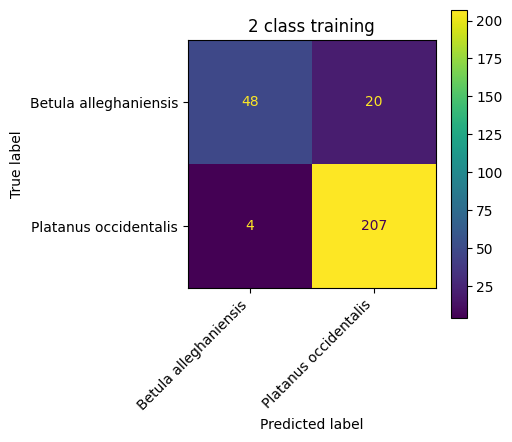

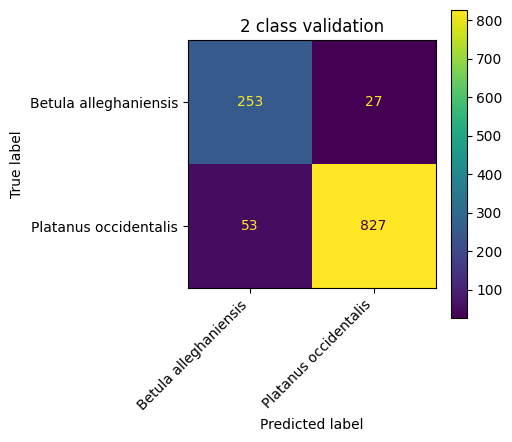

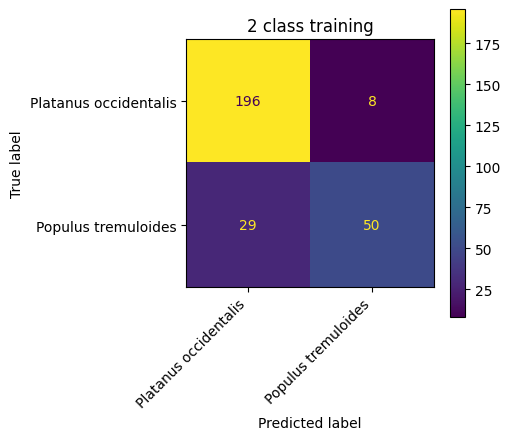

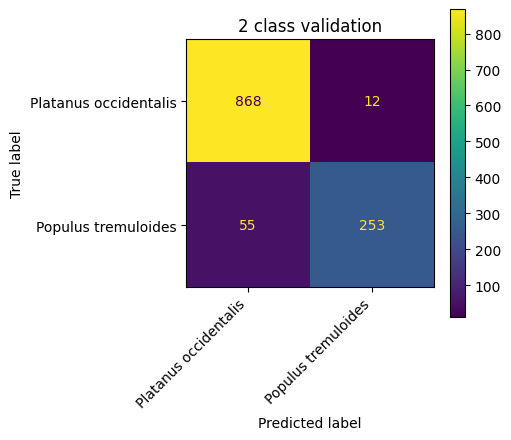

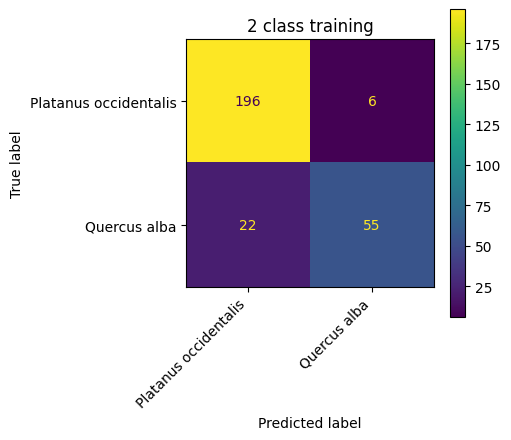

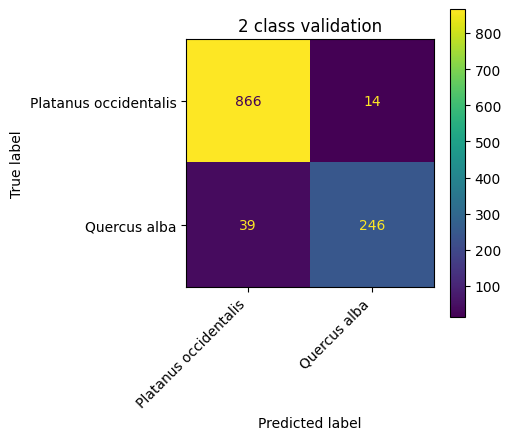

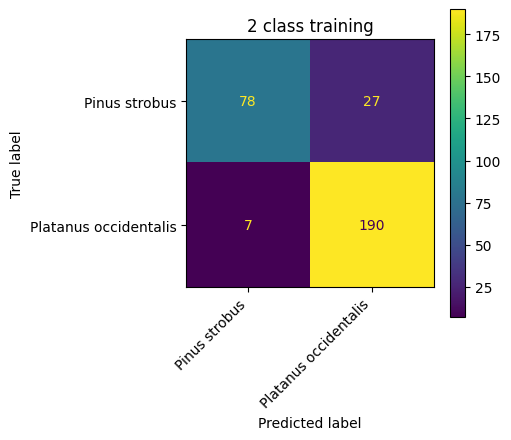

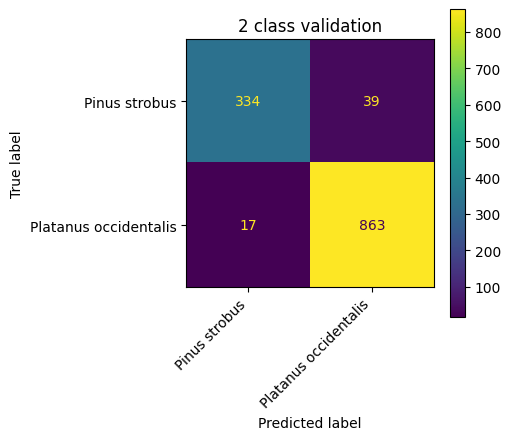

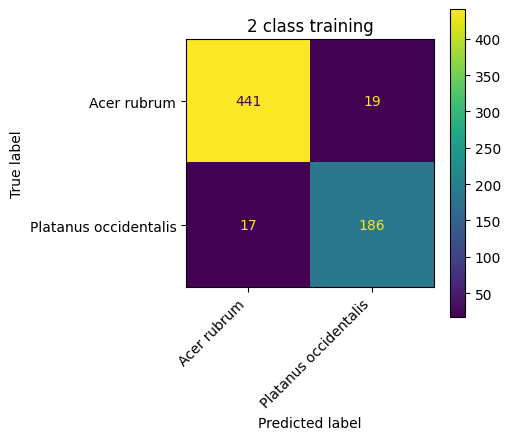

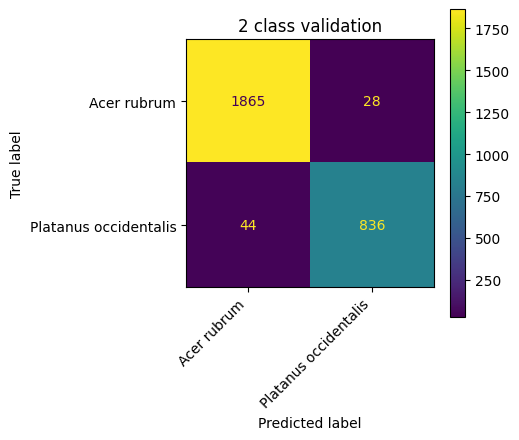

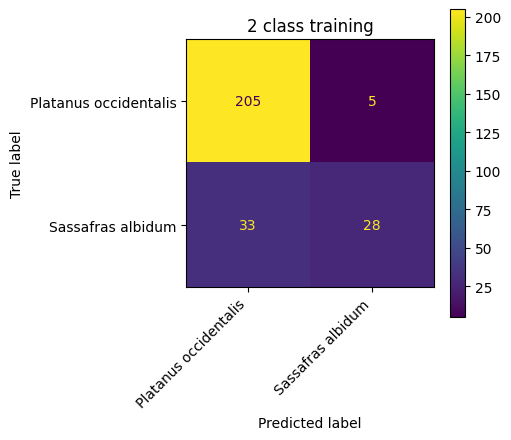

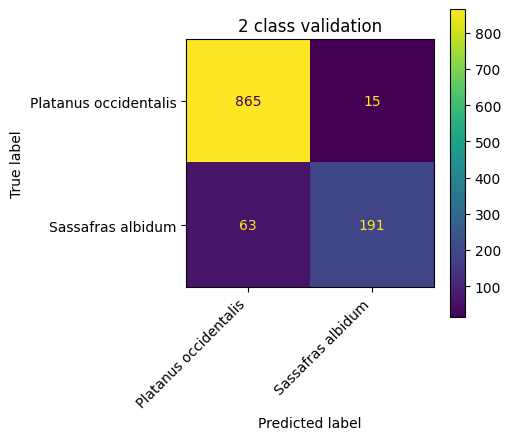

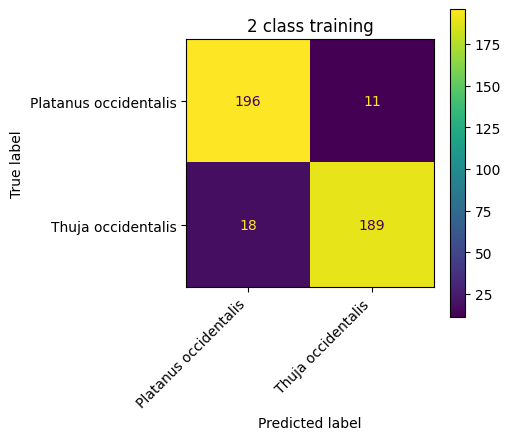

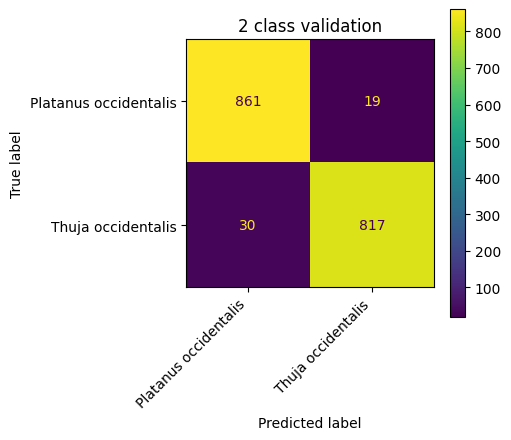

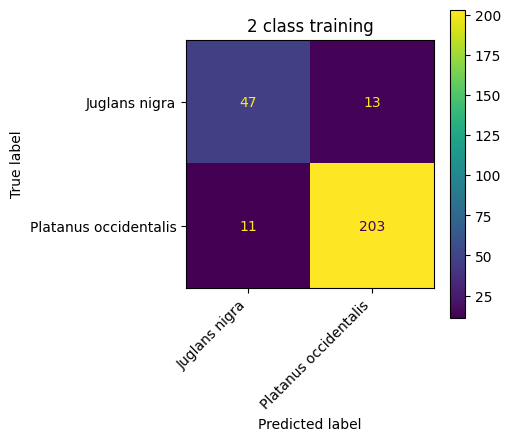


KeyboardInterrupt



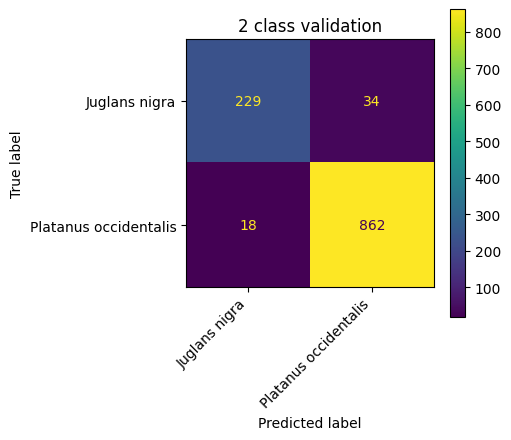

In [16]:
scores = []
for test_species in comb_2:
    training_df = train_df[train_df.species.isin(test_species)]
    valid_df = df[df.species.isin(test_species)]
    score, clf = classify(training_df, training_cols, label='2 class training')
    scores.append([test_species[0], test_species[1], 'Training'] + score)
    score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')
    scores.append([test_species[0], test_species[1], 'Validation'] + score)

In [20]:
from sciviso import Boxplot

boxplot = Boxplot(results, "label", "score", add_dots=True)
boxplot.plot()

NameError: name 'results' is not defined

In [49]:
results = pd.DataFrame(scores, columns=['species1', 'species2', 'label', 'score'])
results.describe()


score
count  110.000000
mean     0.713484
std      0.311955
min      0.000000
25%      0.453444
50%      0.892853
75%      0.991171
max      1.000000

In [50]:
results[results['label'] == 'Validation'].describe()


score
count  55.000000
mean    0.451890
std     0.236277
min     0.000000
25%     0.291271
50%     0.453077
75%     0.583973
max     1.000000

In [51]:
results.sort_values(['label', 'score'], ascending=[False, False])

species1         species2       label     score
69  Quercus velutina      Picea abies  Validation  1.000000
81       Picea abies    Juglans nigra  Validation  0.933908
85       Picea abies  Tilia americana  Validation  0.928571
45       Pinus taeda    Juglans nigra  Validation  0.833333
23    Pinus echinata  Ulmus americana  Validation  0.811491
..               ...              ...         ...       ...
14    Acer saccharum  Tilia americana    Training  0.905617
0     Acer saccharum   Pinus echinata    Training  0.898832
92     Juglans nigra  Tilia americana    Training  0.886874
22    Pinus echinata  Ulmus americana    Training  0.886040
28    Pinus echinata    Juglans nigra    Training  0.872747

[110 rows x 4 columns]

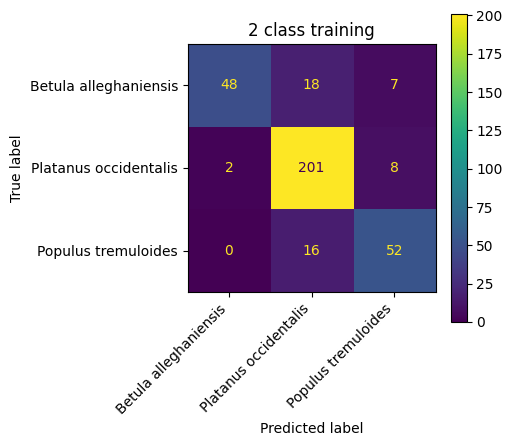

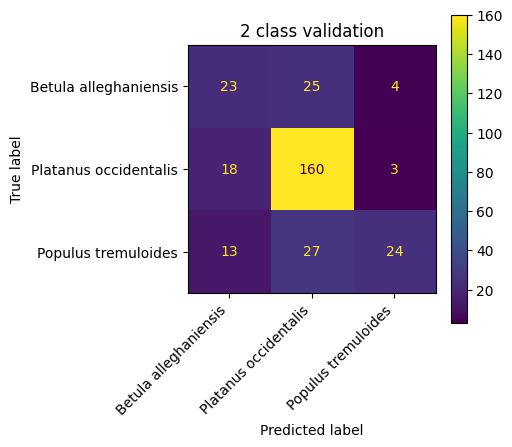

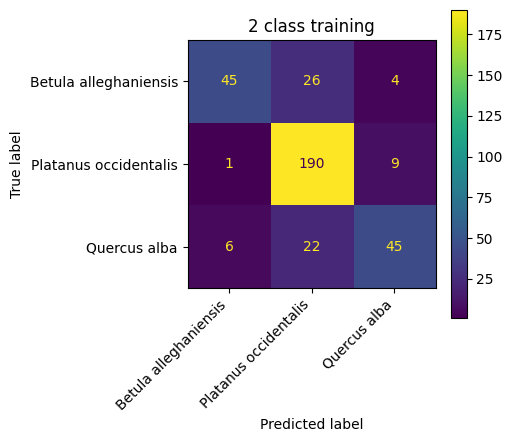

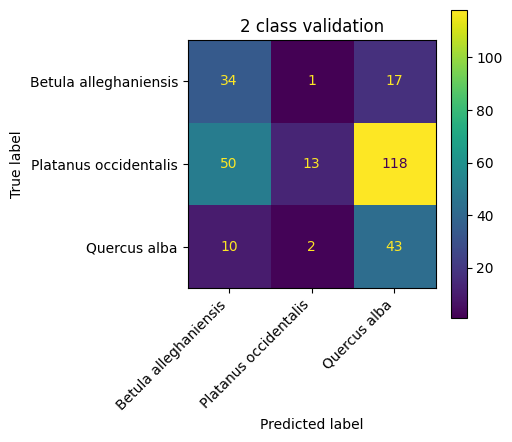

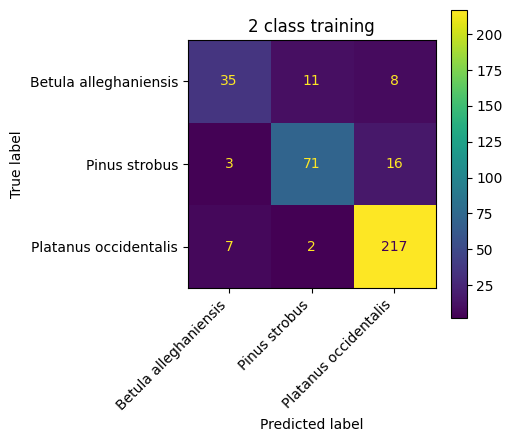

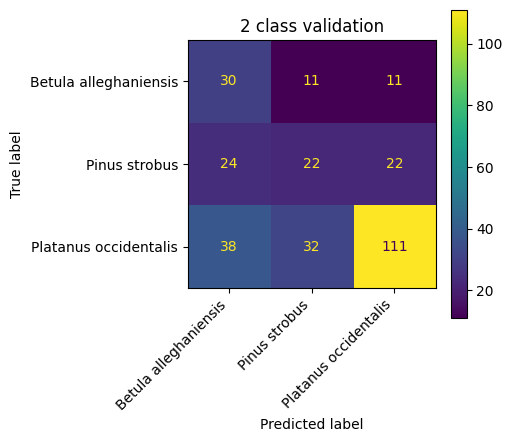

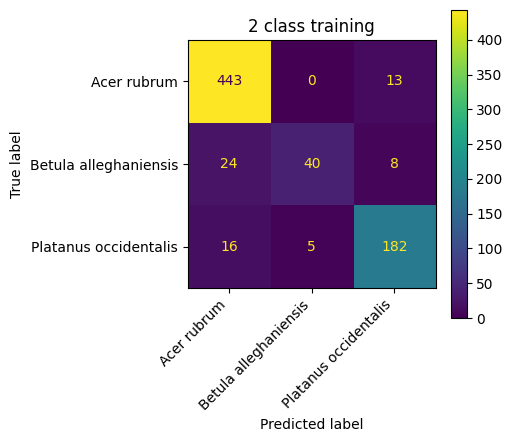

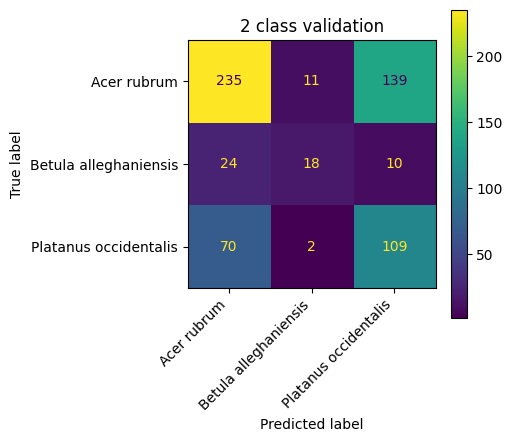

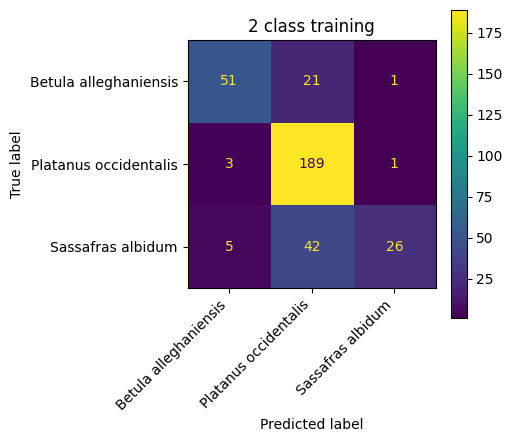

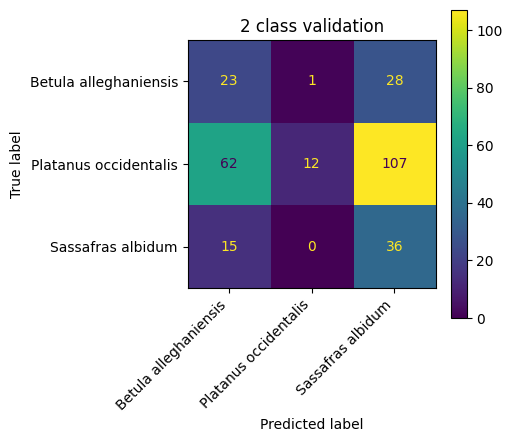

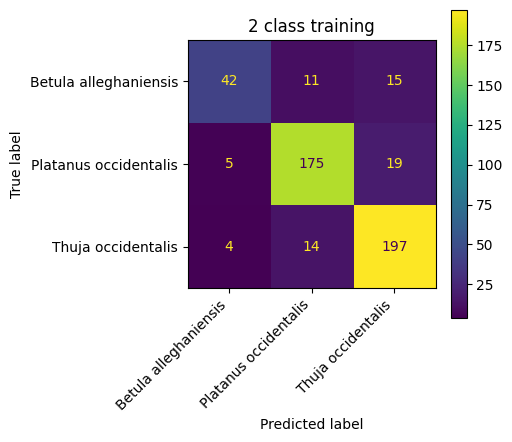

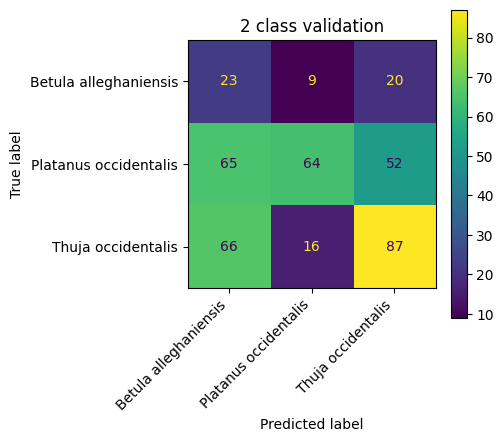

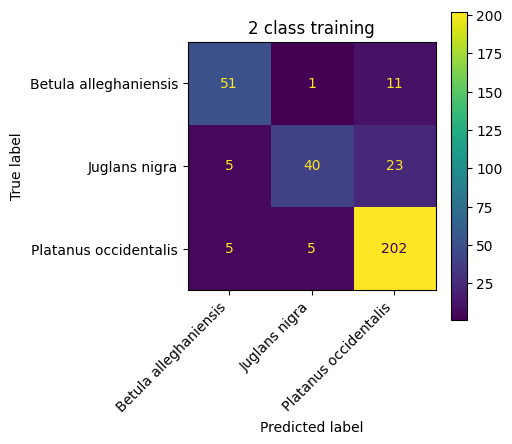

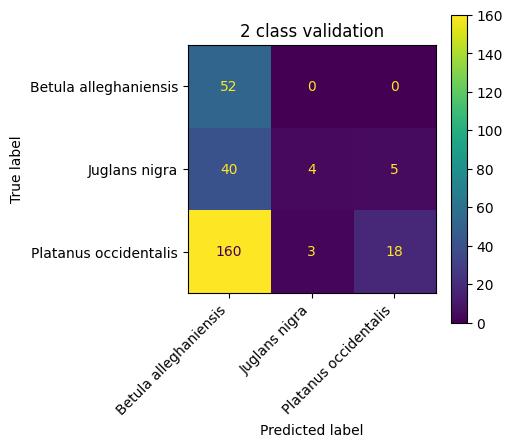

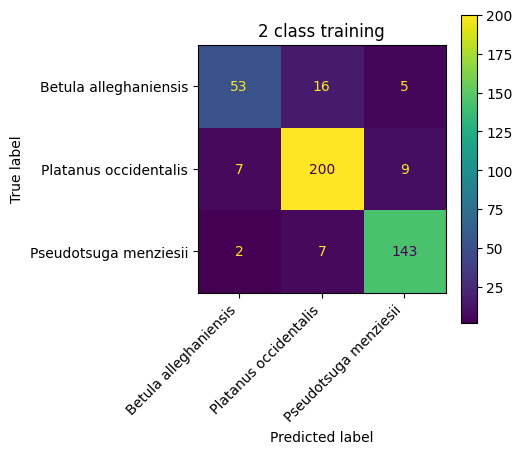

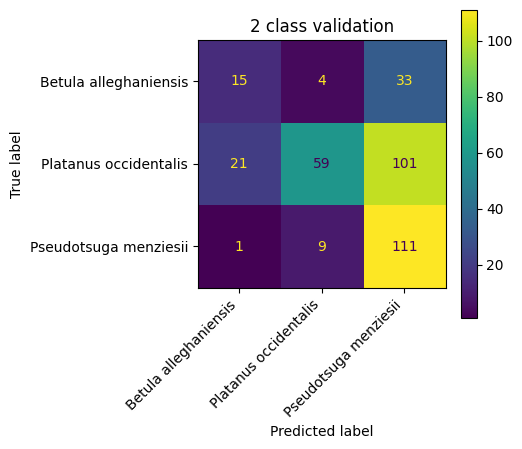

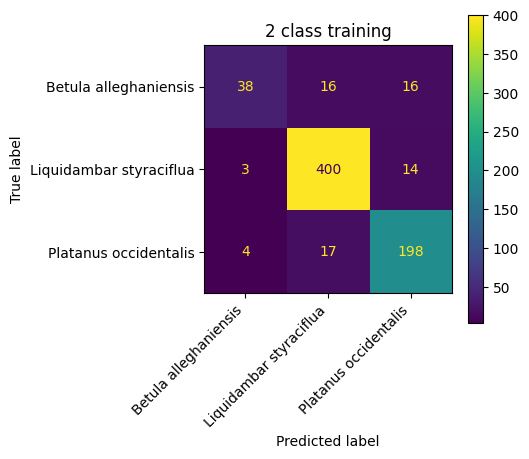

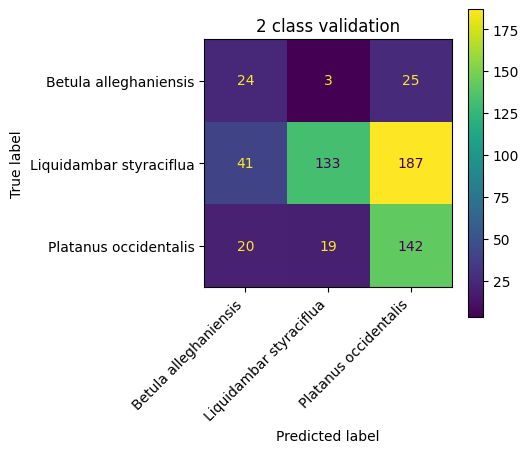

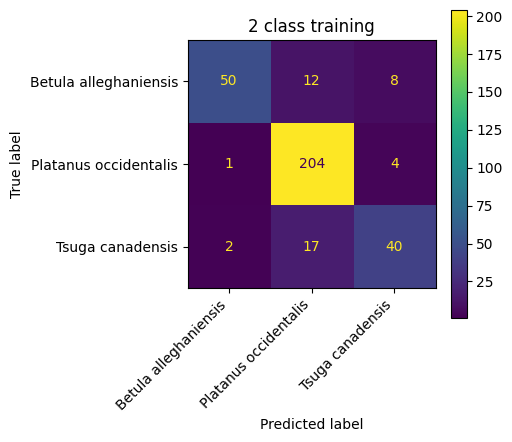

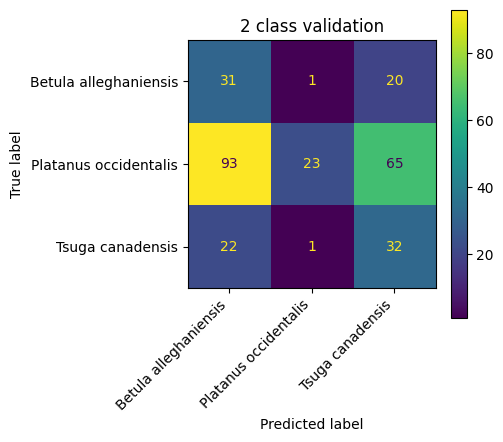

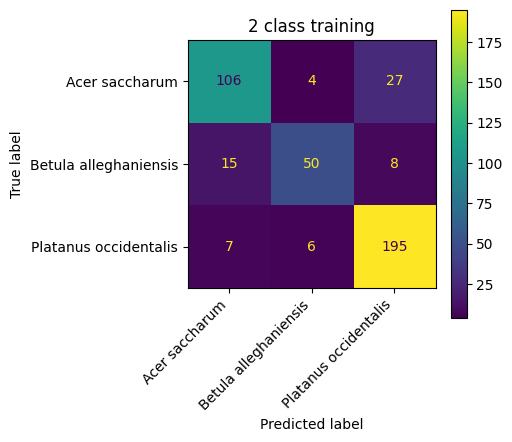

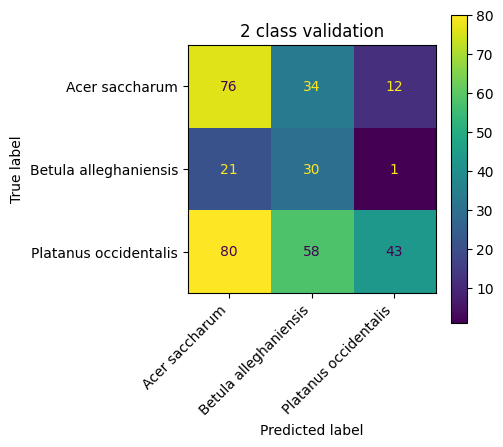

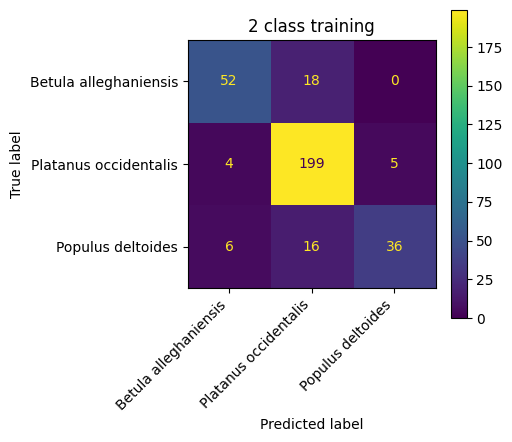

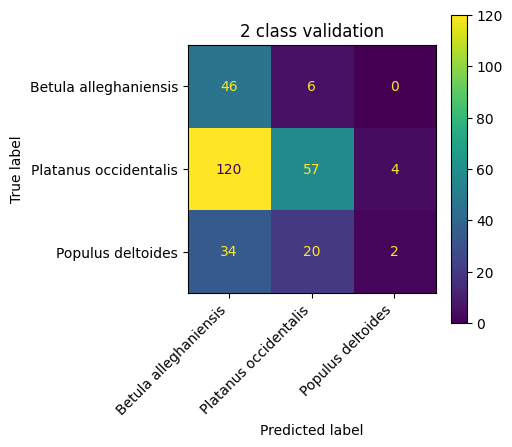

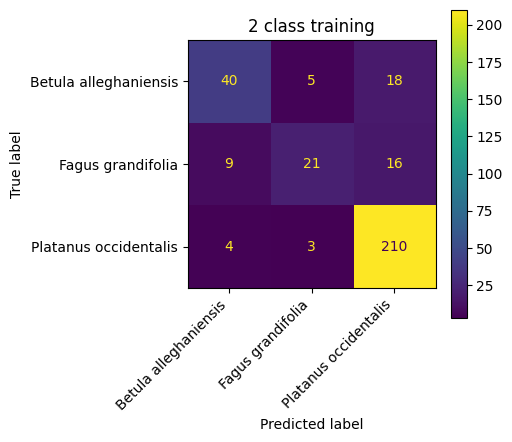

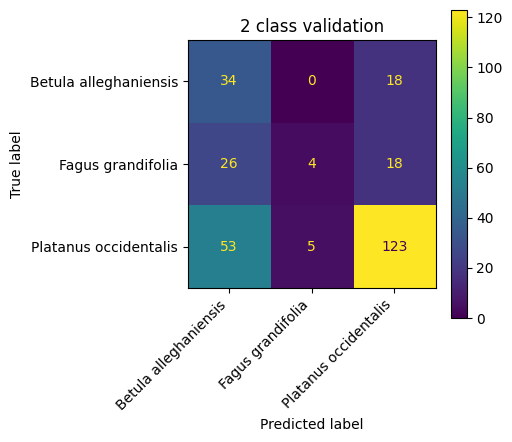

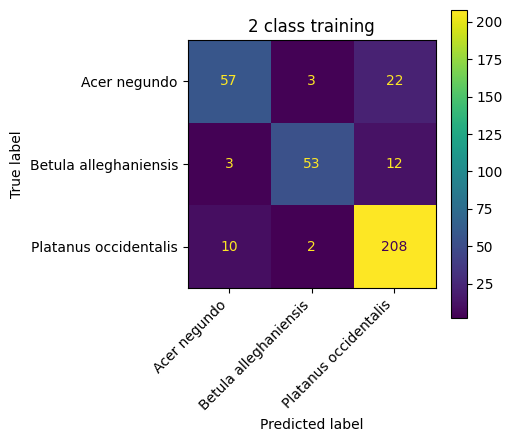

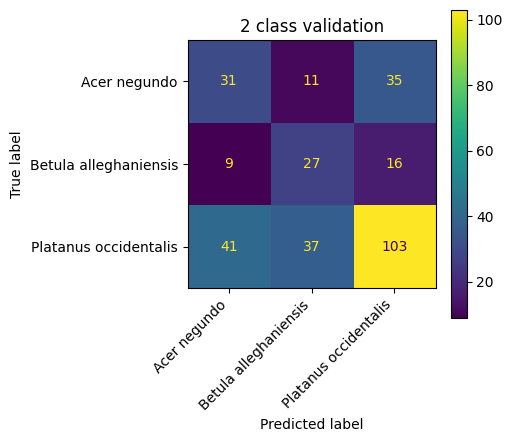


KeyboardInterrupt



In [17]:
scores = []
for test_species in comb_3:
    training_df = train_df[train_df.species.isin(test_species)]
    valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
    score, clf = classify(training_df, training_cols, label='2 class training')
    scores.append([test_species[0], test_species[1], test_species[2], 'Training'] + score)
    score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')
    scores.append([test_species[0], test_species[1], test_species[2], 'Validation'] + score)

In [18]:
results_v3 = pd.DataFrame(scores, columns=['species1', 'species2', 'species3', 'label', 'score'])


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           score
count  14.000000
mean    0.476646
std     0.052923
min     0.393693
25%     0.435485
50%     0.488055
75%     0.509089
max     0.567095
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.468e-06 U_stat=1.960e+02


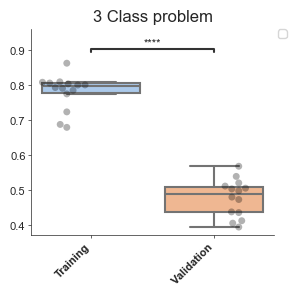

species1               species2                 species3   
1   Platanus occidentalis  Betula alleghaniensis      Populus tremuloides  \
17  Platanus occidentalis  Betula alleghaniensis  Liquidambar styraciflua   
7   Platanus occidentalis  Betula alleghaniensis              Acer rubrum   
15  Platanus occidentalis  Betula alleghaniensis    Pseudotsuga menziesii   
5   Platanus occidentalis  Betula alleghaniensis            Pinus strobus   
3   Platanus occidentalis  Betula alleghaniensis             Quercus alba   
27  Platanus occidentalis  Betula alleghaniensis             Acer negundo   
21  Platanus occidentalis  Betula alleghaniensis           Acer saccharum   
25  Platanus occidentalis  Betula alleghaniensis        Fagus grandifolia   
11  Platanus occidentalis  Betula alleghaniensis       Thuja occidentalis   
19  Platanus occidentalis  Betula alleghaniensis         Tsuga canadensis   
23  Platanus occidentalis  Betula alleghaniensis        Populus deltoides   
9   Platanus occidentalis  Betula alleghaniensis        Sassafras albidum   
13  Platanus occidentalis  Betula alleghaniensis            Juglans nigra   
14  Platanus occidentalis  Betula alleghaniensis    Pseudotsuga menziesii   
6   Platanus occidentalis  Betula alleghaniensis              Acer rubrum   
26  Platanus occidentalis  Betula alleghaniensis             Acer negundo   
10  Platanus occidentalis  Betula alleghaniensis       Thuja occidentalis   
16  Platanus occidentalis  Betula alleghaniensis  Liquidambar styraciflua   
4   Platanus occidentalis  Betula alleghaniensis            Pinus strobus   
20  Platanus occidentalis  Betula alleghaniensis           Acer saccharum   
0   Platanus occidentalis  Betula alleghaniensis      Populus tremuloides   
18  Platanus occidentalis  Betula alleghaniensis         Tsuga canadensis   
12  Platanus occidentalis  Betula alleghaniensis            Juglans nigra   
22  Platanus occidentalis  Betula alleghaniensis        Populus deltoides   
2   Platanus occidentalis  Betula alleghaniensis             Quercus alba   
24  Platanus occidentalis  Betula alleghaniensis        Fagus grandifolia   
8   Platanus occidentalis  Betula alleghaniensis        Sassafras albidum   

         label     score  
1   Validation  0.567095  
17  Validation  0.538163  
7   Validation  0.519584  
15  Validation  0.510595  
5   Validation  0.504571  
3   Validation  0.502496  
27  Validation  0.496963  
21  Validation  0.479148  
25  Validation  0.472246  
11  Validation  0.436897  
19  Validation  0.435015  
23  Validation  0.411749  
9   Validation  0.404829  
13  Validation  0.393693  
14    Training  0.860977  
6     Training  0.807866  
26    Training  0.806663  
10    Training  0.804441  
16    Training  0.802066  
4     Training  0.799071  
20    Training  0.798718  
0     Training  0.791616  
18    Training  0.789443  
12    Training  0.783530  
22    Training  0.773426  
2     Training  0.722146  
24    Training  0.686395  
8     Training  0.678023

In [19]:
print(results_v3[results_v3['label'] == 'Validation'].describe())

boxplot = Boxplot(results_v3, "label", "score", title='3 Class problem', add_dots=True)
boxplot.plot()
plt.savefig(f'{fig_dir}Figure3_3Class.svg')
plt.show()
results_v3.sort_values(['label', 'score'], ascending=[False, False])

In [20]:
print(results[results['label'] == 'Validation'].describe())

boxplot = Boxplot(results, "label", "score", title='2 Class problem', add_dots=True)
boxplot.plot()
plt.savefig(f'{fig_dir}Figure3_2Class.svg')
plt.show()
results_v3.sort_values(['label', 'score'], ascending=[False, False])

NameError: name 'results' is not defined

            score
count  330.000000
mean     0.187775
std      0.115412
min      0.000000
25%      0.087839
50%      0.198082
75%      0.270058
max      0.500000


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.700e-109 U_stat=1.089e+05


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: Use

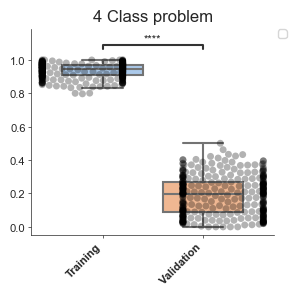

species1          species2          species3       label     score
485      Pinus taeda       Picea abies     Juglans nigra  Validation  0.500000
451      Pinus taeda  Quercus velutina       Picea abies  Validation  0.461686
301   Pinus echinata   Ulmus americana  Quercus velutina  Validation  0.434006
555  Ulmus americana       Picea abies     Juglans nigra  Validation  0.432471
483      Pinus taeda       Picea abies     Juglans nigra  Validation  0.423851
..               ...               ...               ...         ...       ...
24    Acer saccharum    Pinus echinata   Ulmus americana    Training  0.834343
324   Pinus echinata   Ulmus americana     Juglans nigra    Training  0.832519
20    Acer saccharum    Pinus echinata   Ulmus americana    Training  0.799789
54    Acer saccharum    Pinus echinata     Juglans nigra    Training  0.798901
320   Pinus echinata   Ulmus americana     Juglans nigra    Training  0.795630

[660 rows x 5 columns]

In [70]:
print(results_v4[results_v4['label'] == 'Validation'].describe())

boxplot = Boxplot(results_v4, "label", "score", title='4 Class problem', add_dots=True)
boxplot.plot()
plt.savefig(f'{fig_dir}Figure3_4Class.svg')
plt.show()
results_v4.sort_values(['label', 'score'], ascending=[False, False])

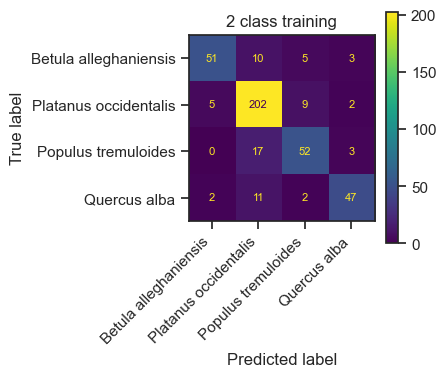

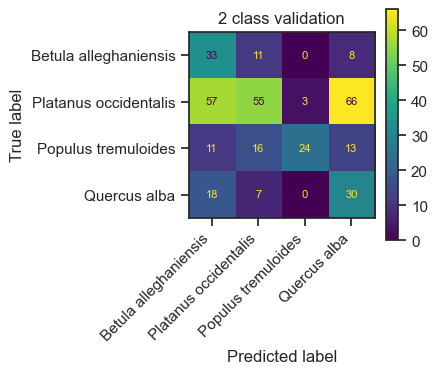

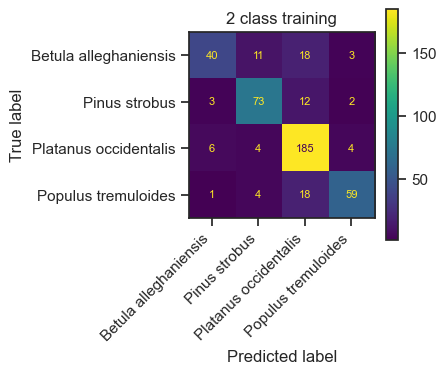

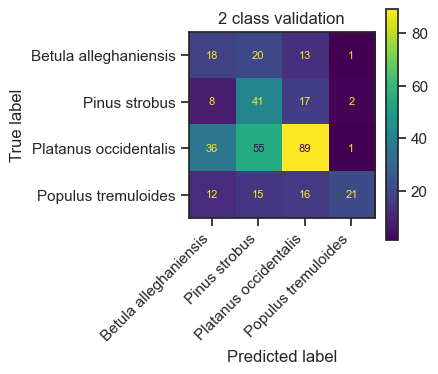

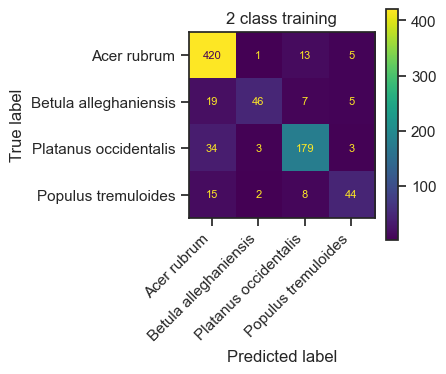

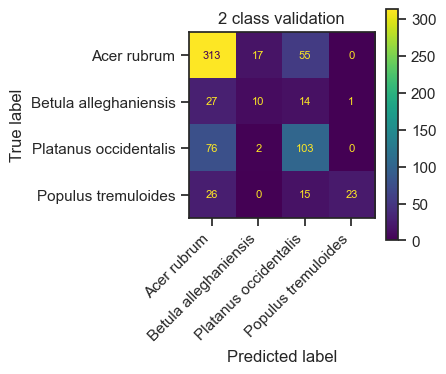

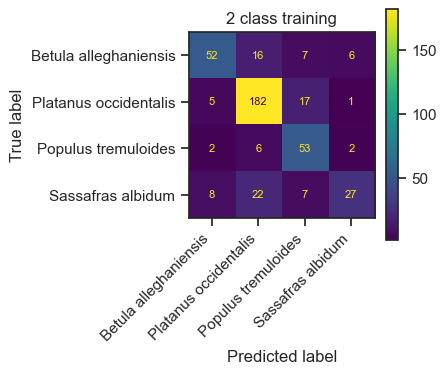

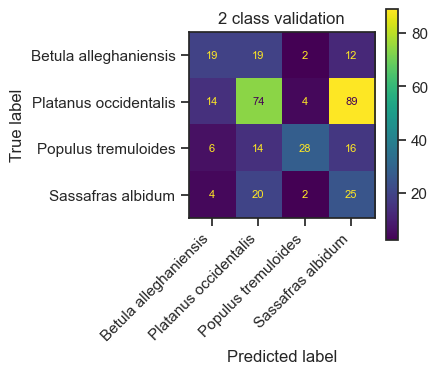

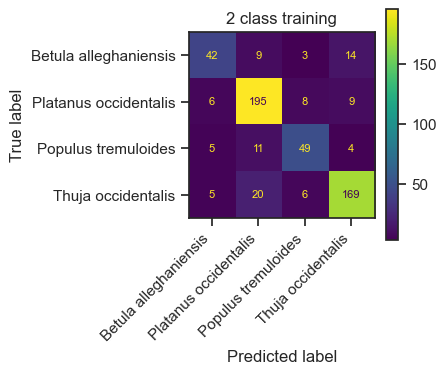

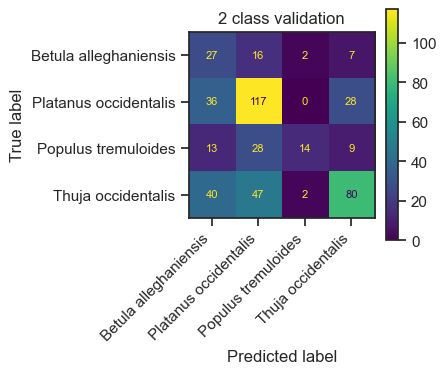

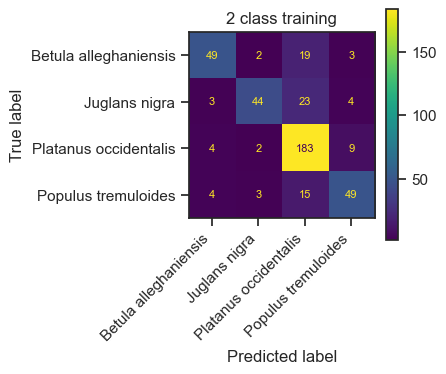

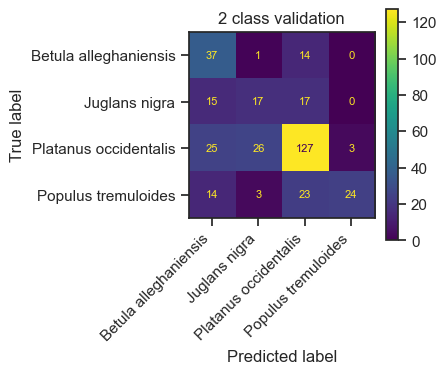

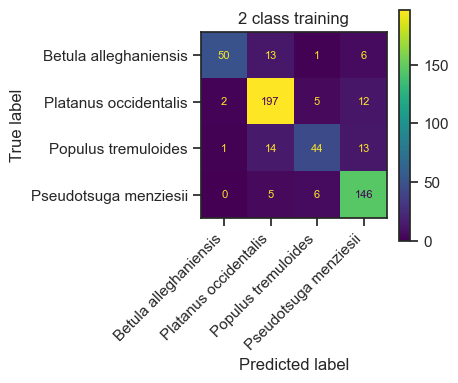

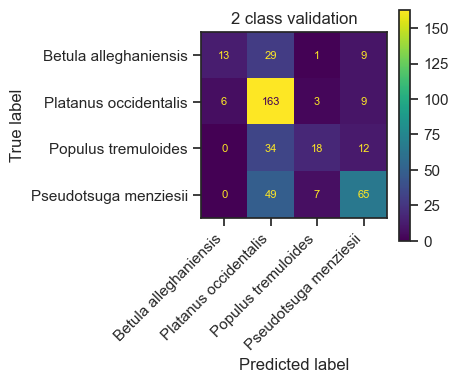

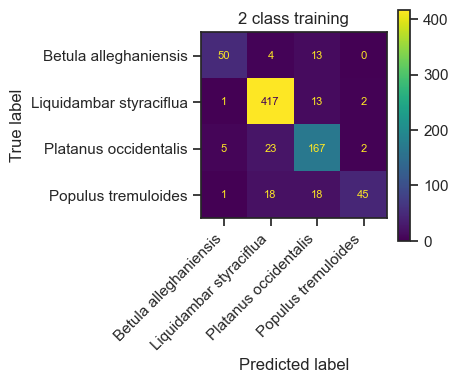

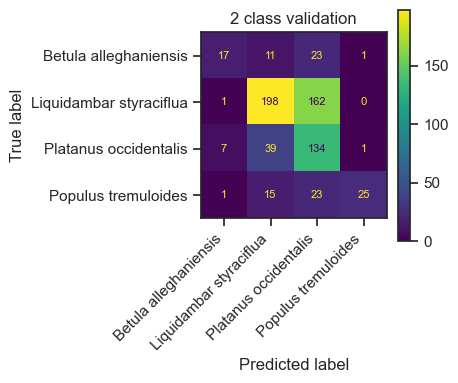

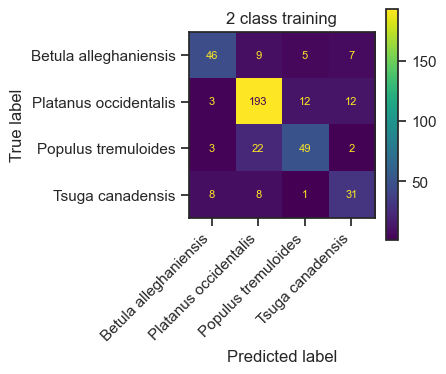

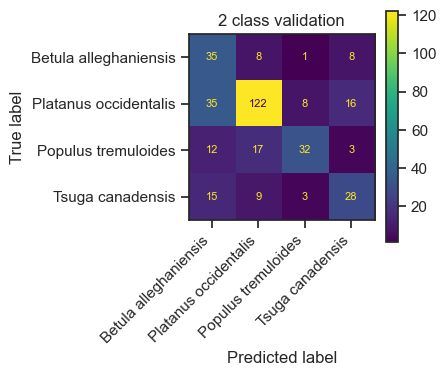

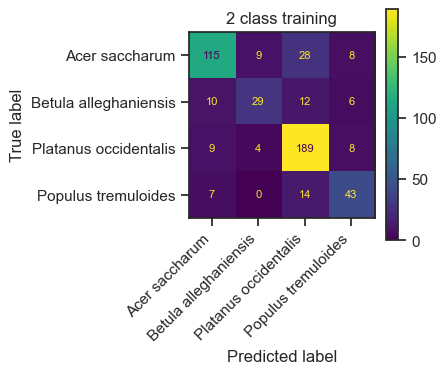

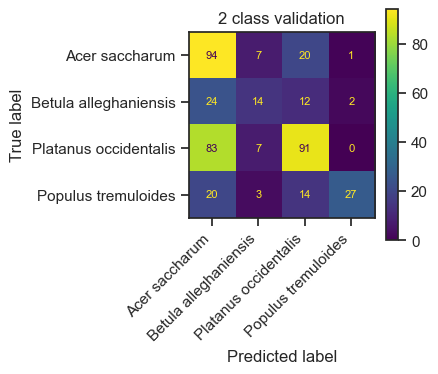

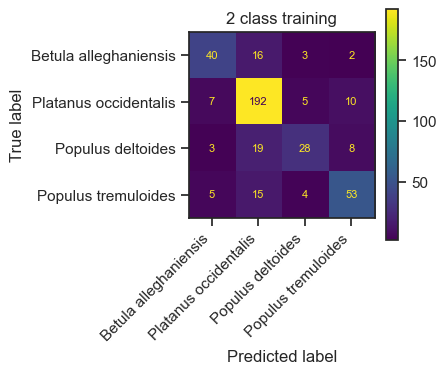

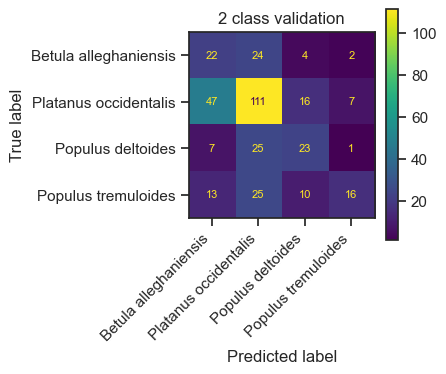

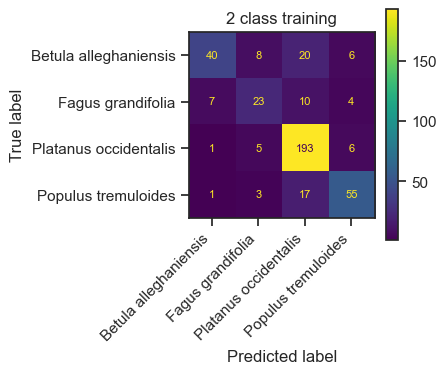

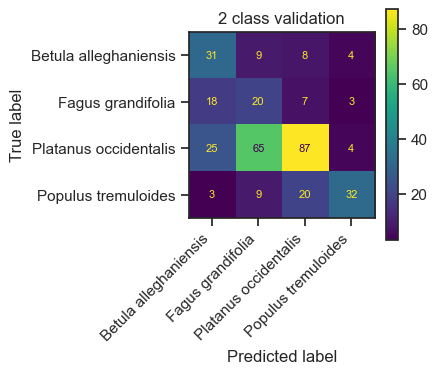

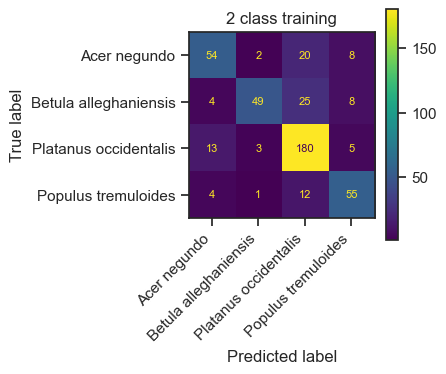

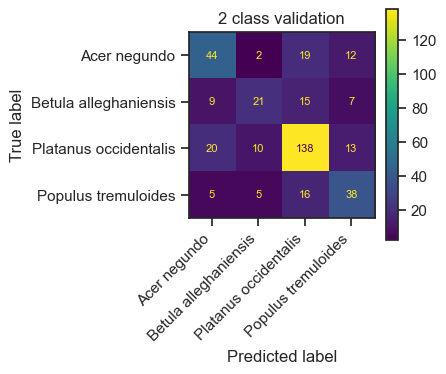

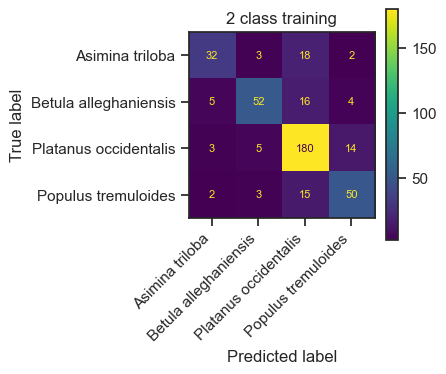

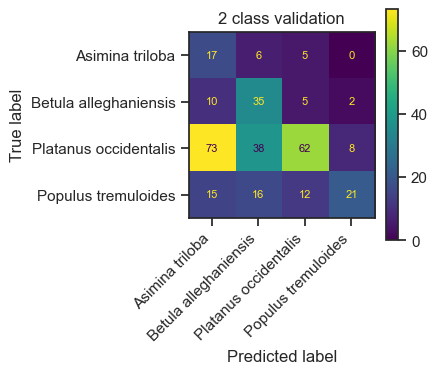

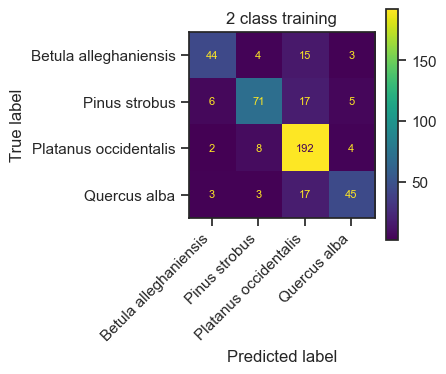

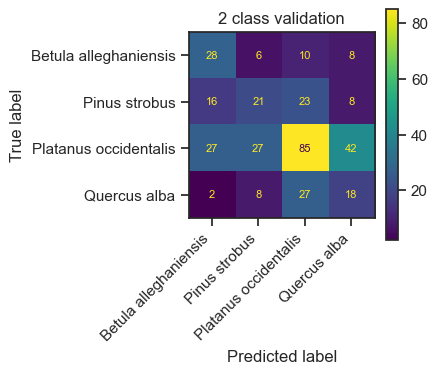

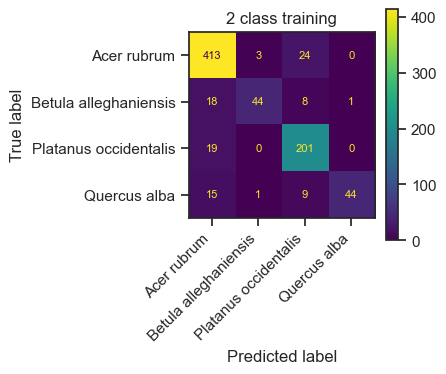

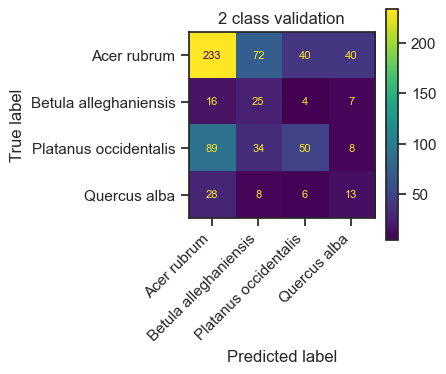

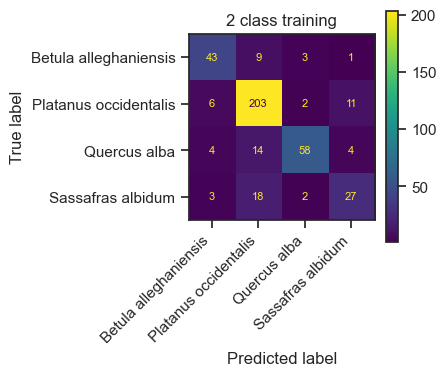

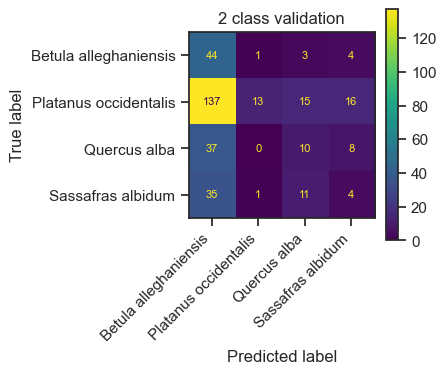

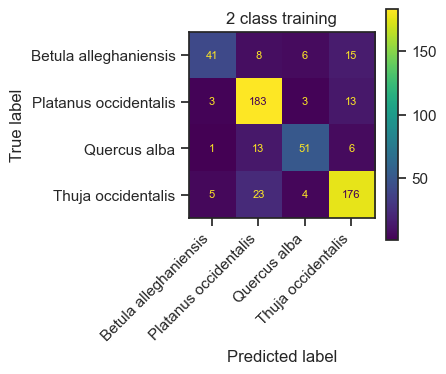

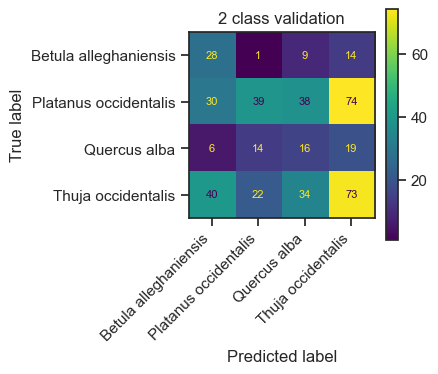

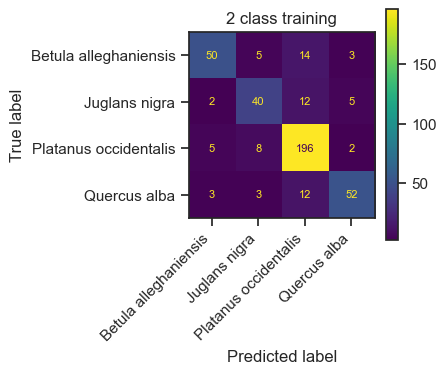

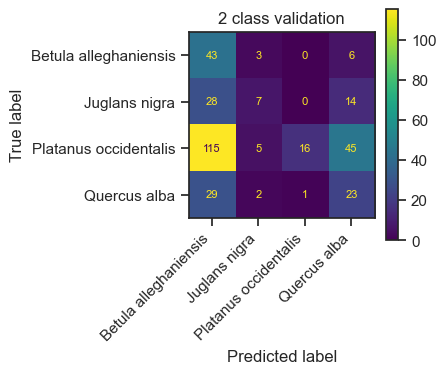

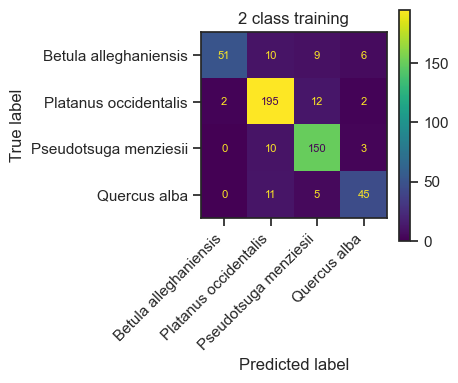

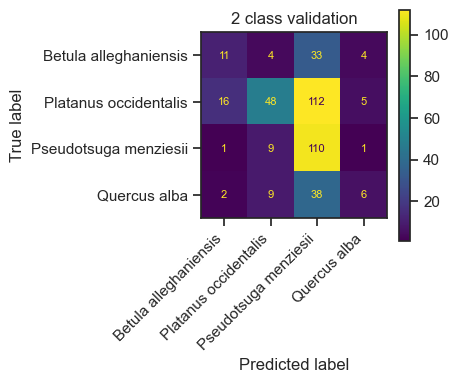


KeyboardInterrupt



Error in callback <function flush_figures at 0x147fbe680> (for post_execute):


KeyboardInterrupt: 

In [21]:
scores = []
for test_species in comb_4:
    training_df = train_df[train_df.species.isin(test_species)]
    valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
    score, clf = classify(training_df, training_cols, label='2 class training')
    scores.append([test_species[0], test_species[1], test_species[2], 'Training'] + score)
    score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')
    scores.append([test_species[0], test_species[1], test_species[2], 'Validation'] + score)

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           score
count  20.000000
mean    0.454928
std     0.073769
min     0.294557
25%     0.408193
50%     0.464587
75%     0.493779
max     0.589050
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.796e-08 U_stat=4.000e+02


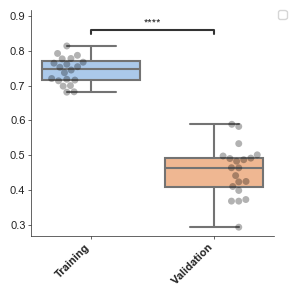

species1               species2             species3   
17  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides  \
25  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
11  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
15  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
23  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
13  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
19  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
27  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
5   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
1   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
9   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
3   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
7   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
21  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
29  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
31  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
39  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
35  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
37  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
33  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
38  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
12  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
0   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
30  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
14  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
8   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
34  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
36  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
2   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
4   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
28  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
32  Platanus occidentalis  Betula alleghaniensis         Quercus alba   
10  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
24  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
26  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
16  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
18  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
6   Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
22  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   
20  Platanus occidentalis  Betula alleghaniensis  Populus tremuloides   

         label     score  
17  Validation  0.589050  
25  Validation  0.582864  
11  Validation  0.533784  
15  Validation  0.501589  
23  Validation  0.498371  
13  Validation  0.492248  
19  Validation  0.491090  
27  Validation  0.487722  
5   Validation  0.483433  
1   Validation  0.464734  
9   Validation  0.464441  
3   Validation  0.442233  
7   Validation  0.425480  
21  Validation  0.424263  
29  Validation  0.411043  
31  Validation  0.399643  
39  Validation  0.373728  
35  Validation  0.369198  
37  Validation  0.369090  
33  Validation  0.294557  
38    Training  0.813293  
12    Training  0.791843  
0     Training  0.786506  
30    Training  0.777418  
14    Training  0.776453  
8     Training  0.766822  
34    Training  0.764030  
36    Training  0.761044  
2     Training  0.753957  
4     Training  0.752289  
28    Training  0.744410  
32    Training  0.736818  
10    Training  0.720053  
24    Training  0.718009  
26    Training  0.715629  
16    Training  0.713603  
18    Training  0.699849

In [22]:
results_v4 = pd.DataFrame(scores, columns=['species1', 'species2', 'species3', 'label', 'score'])
print(results_v4[results_v4['label'] == 'Validation'].describe())

boxplot = Boxplot(results_v4, "label", "score", add_dots=True)
boxplot.plot()
plt.show()
results_v4.sort_values(['label', 'score'], ascending=[False, False])

In [27]:
test_species

['Quercus velutina', 'Picea abies']

Pinus palustris            40
Pseudotsuga menziesii      40
Acer rubrum                25
Quercus stellata           22
Acer saccharum             17
Quercus rubra              16
Tsuga canadensis           15
Populus tremuloides        15
Tsuga heterophylla         15
Metrosideros polymorpha    13
Pinus contorta             13
Abies balsamea             13
Picea engelmannii          13
Liquidambar styraciflua    12
Quercus alba               12
Abies lasiocarpa           11

In [30]:
train_df.species.value_counts()

species
Acer rubrum                1508
Liquidambar styraciflua    1424
Platanus occidentalis       699
Thuja occidentalis          678
Pseudotsuga menziesii       544
Acer saccharum              464
Acer negundo                305
Pinus strobus               305
Populus tremuloides         244
Quercus alba                230
Betula alleghaniensis       228
Juglans nigra               214
Sassafras albidum           203
Tsuga canadensis            197
Populus deltoides           193
Asimina triloba             173
Fagus grandifolia           159
Name: count, dtype: int64

In [ ]:
sp_2 = ['Acer negundo', 'Pinus strobus']
sp_2_imb = ['Populus deltoides', 'Pinus strobus']
sp_3 = ['Acer saccharum', 'Acer negundo', 'Pinus strobus']
sp_4 = ['Populus tremuloides', 'Fagus grandifolia', 'Acer saccharum', 'Acer negundo']


In [ ]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
plt.rcParams["figure.figsize"] = (2,2)
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = sp_2
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
score, clf = classify(training_df, training_cols, label='2 class training')
score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')

# ---------- 2 class problem with imbalance
test_species = sp_2_imb
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
score, clf  = classify(training_df, training_cols, label='2 class training imbalanced')
score, clf  = classify(valid_df, training_cols, clf=clf, label='2 class validation imbalanced')

# ---------- 3 class problem
test_species = sp_3
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
score, clf  = classify(training_df, training_cols, label='3 class training')
score, clf  = classify(valid_df, training_cols, clf=clf, label='3 class validation')

# ---------- 4 class problem
test_species = sp_4
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
score, clf  = classify(training_df, training_cols, label='4 class training')
score, clf  = classify(valid_df, training_cols, clf=clf, label='4 class validation')

plt.rcParams["figure.figsize"] = (8,8)

# ---------- All
training_df = train_df.copy() #[train_df.species.isin(test_species)]
valid_df = neon_gold_df.copy() #[neon_gold_df.species.isin(test_species)]
score, clf  = classify(training_df, training_cols, label='All class training')
score, clf  = classify(valid_df, training_cols, clf=clf, label='All class validation')



In [23]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
plt.rcParams["figure.figsize"] = (2,2)
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = sp_2
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')

# ---------- 2 class problem with imbalance
test_species = sp_2_imb
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training imbalanced', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation imbalanced')

# ---------- 3 class problem
test_species = sp_3
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation')

# ---------- 4 class problem
test_species = sp_4
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='4 class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='4 class validation')

plt.rcParams["figure.figsize"] = (8,8)

# ---------- All
training_df = train_df.copy() #[train_df.species.isin(test_species)]
valid_df = neon_gold_df.copy() #[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='All class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='All class validation')



NameError: name 'sp_2' is not defined

Pinus palustris            40
Pseudotsuga menziesii      40
Acer rubrum                25
Quercus stellata           22
Acer saccharum             17
Quercus rubra              16
Tsuga canadensis           15
Populus tremuloides        15
Tsuga heterophylla         15
Metrosideros polymorpha    13
Pinus contorta             13
Abies balsamea             13
Picea engelmannii          13
Liquidambar styraciflua    12
Quercus alba               12
Abies lasiocarpa           11

balanced_accuracy_score 0.8931204926667207


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


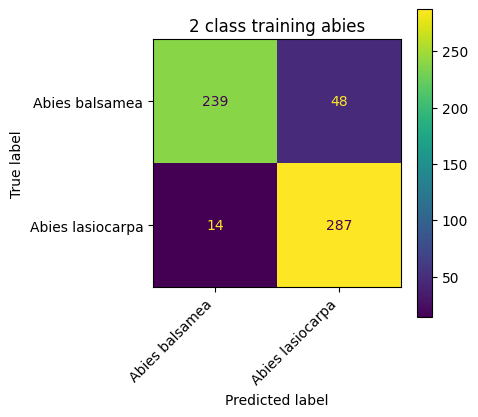

balanced_accuracy_score 0.6958041958041958


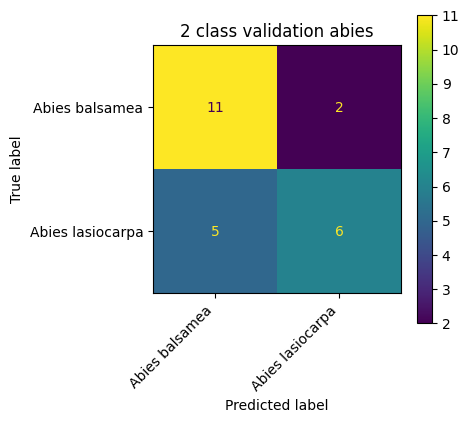

balanced_accuracy_score 0.7878754171301445


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


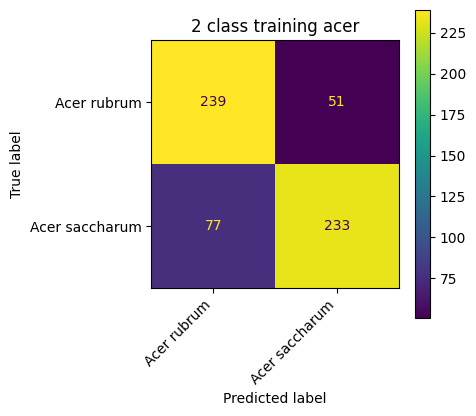

balanced_accuracy_score 0.39294117647058824


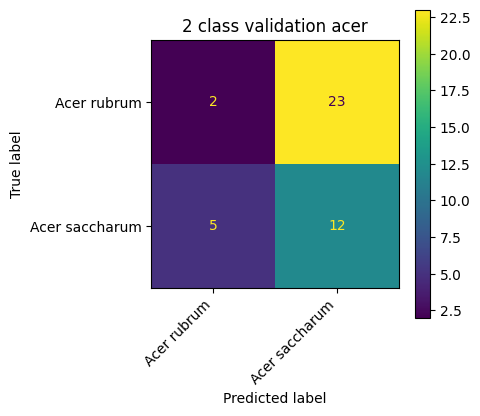

balanced_accuracy_score 0.8267154301637061


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


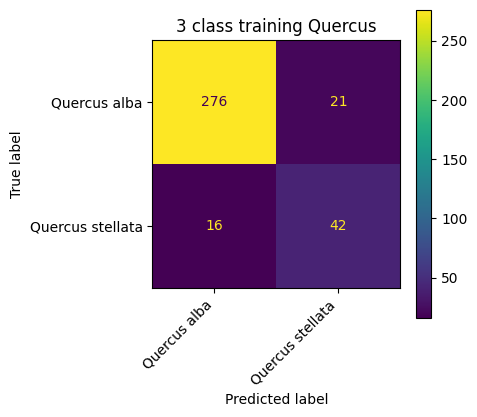

balanced_accuracy_score 0.5189393939393939


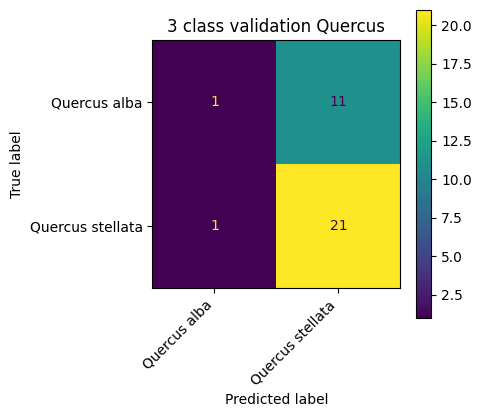

balanced_accuracy_score 0.9899665551839465


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


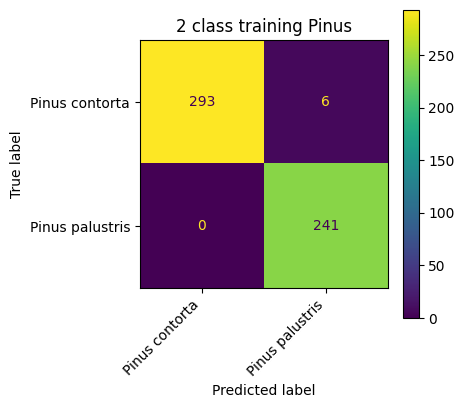

balanced_accuracy_score 0.5490384615384616


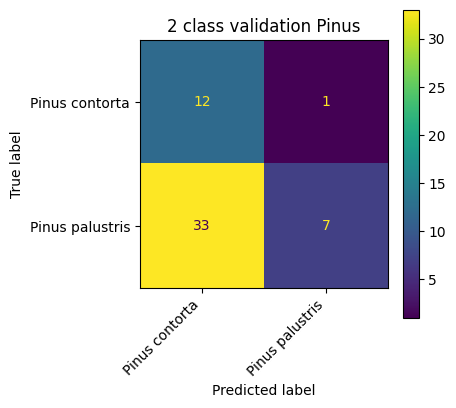

In [38]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

plt.rcParams["figure.figsize"] = (4,4)

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = ['Abies lasiocarpa', 'Abies balsamea']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training abies', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation abies')

# ---------- 2 class problem with imbalance
test_species = ['Acer rubrum', 'Acer saccharum']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training acer', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation acer')

# ---------- 3 class problem
test_species = ['Quercus stellata', 'Quercus alba', 'Quercus stellata']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training Quercus', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation Quercus')

# ---------- 2 class problem
test_species = ['Pinus palustris', 'Pinus contorta']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training Pinus', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation Pinus')


balanced_accuracy_score 0.9641439105420955


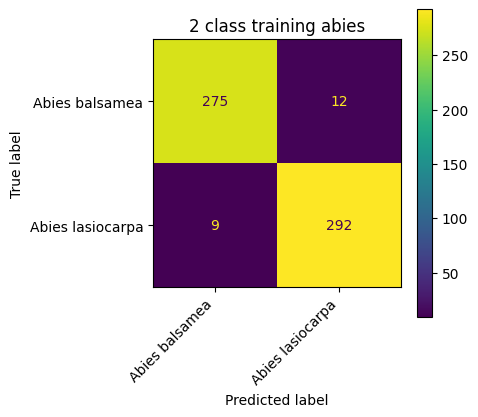

balanced_accuracy_score 0.6433566433566433


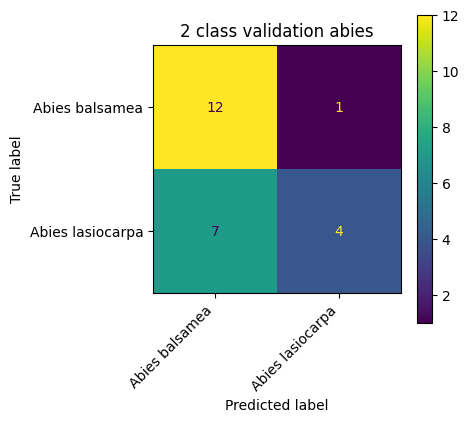

balanced_accuracy_score 0.9078420467185762


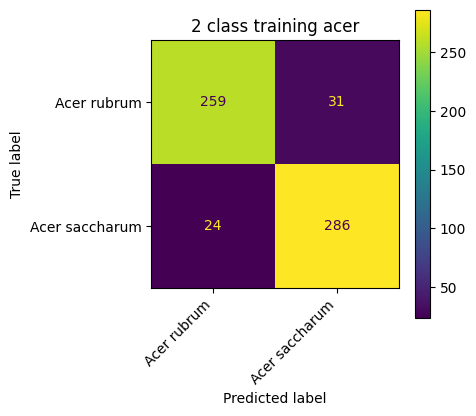

balanced_accuracy_score 0.5


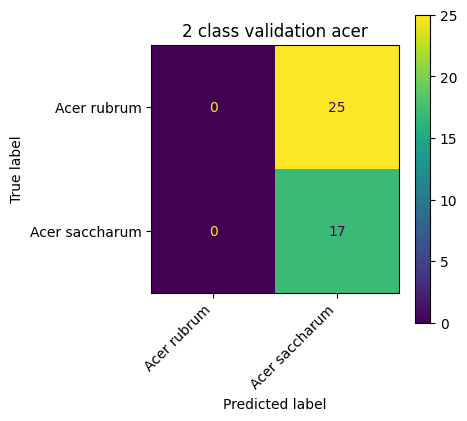

balanced_accuracy_score 0.8069778242192036


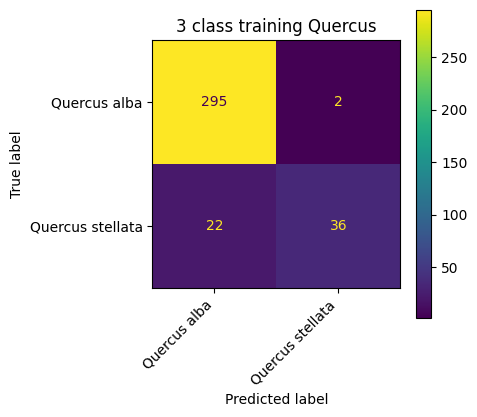

balanced_accuracy_score 0.4962121212121212


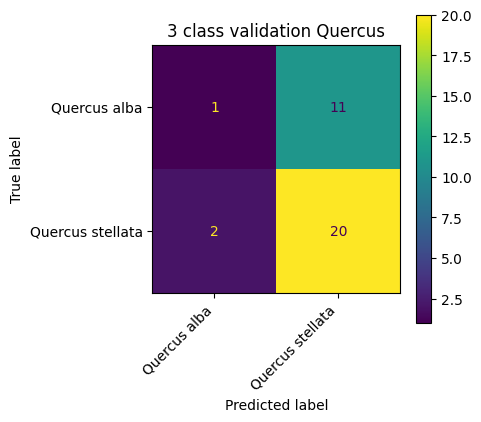

balanced_accuracy_score 0.9962530704006439


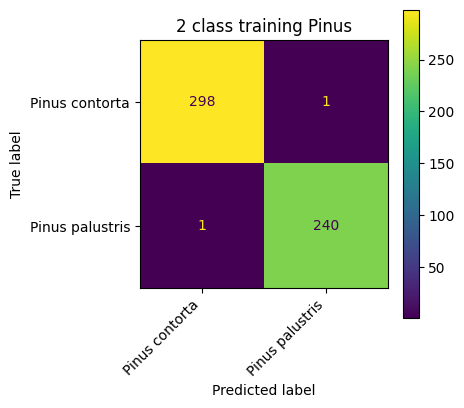

balanced_accuracy_score 0.525


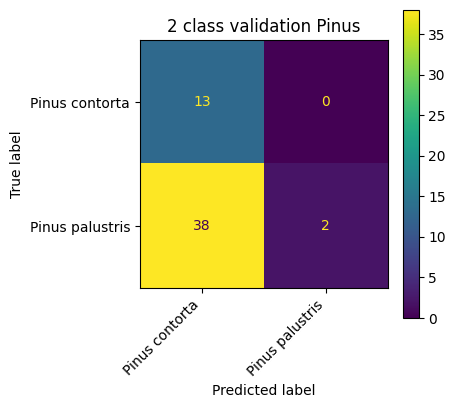

In [39]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

plt.rcParams["figure.figsize"] = (4,4)

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = ['Abies lasiocarpa', 'Abies balsamea']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training abies')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation abies')

# ---------- 2 class problem with imbalance
test_species = ['Acer rubrum', 'Acer saccharum']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training acer')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation acer')

# ---------- 3 class problem
test_species = ['Quercus stellata', 'Quercus alba', 'Quercus stellata']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training Quercus')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation Quercus')

# ---------- 2 class problem
test_species = ['Pinus palustris', 'Pinus contorta']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training Pinus')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation Pinus')
